# Numerical Solutions to PDEs (one dimension)

# Finite Volume Method 

https://projects.skill-lync.com/projects/FVM-schemes-49852
https://floringh.gitbooks.io/computational-fluid-dynamics/1dLinearConvection.html

## Convection–diffusion equation

The convection–diffusion equation is a combination of the diffusion and convection (advection) equations, and describes physical phenomena where particles, energy, or other physical quantities are transferred inside a physical system due to two processes: diffusion and convection. Depending on context, the same equation can be called the convection–diffusion equation, drift-diffusion equation, or (generic) scalar transport equation.

$$  \underbrace{\frac{\partial\phi}{\partial t}}_\text{Transient Term}  = \underbrace{-\nabla\cdot(\mathbf{u}\phi)}_\text{Convectiion Term}  +  \underbrace{\nabla\cdot(D\nabla\phi)}_\text{Diffusion Term}+ \underbrace{R}_\text{Source Term} \tag{1}$$

where $\phi$ is the variable of interest. $\mathbf{u}$  is the velocity field that the quantity $\phi$ is moving with. $D$ is the diffusivity. $R$ describes sources or sinks of the quantity.

https://github.com/simulkade/JFVM.jl

Integrating the convection-diffusion equation over a control volume (c.v.) yields

$$ \int_{c.v.}\frac{\partial\phi}{\partial t} \,dV= -\int_{c.v.}\nabla\cdot(\mathbf{u}\phi) \,dV+
\int_{c.v.}\nabla\cdot(D\nabla\phi)\,dV+
\int_{c.v.}R\,dV  \tag{2}$$

The next step in solving the problem in finite volume problem is to reformulate above equation in algebraic form. This requires the **elimination of all integral sign and derivatives**.


Replacing the volume integrals of convection and diffusion terms by surface integrals through the Gauss's theorem [(divergence theorem)](https://en.wikipedia.org/wiki/Divergence_theorem), the equation becomes,

$$ \int_{c.v.}\frac{\partial\phi}{\partial t} \,dV= -\int_{c.s.}(\mathbf{u}\phi)\cdot \mathbf{n}\, dS+
\int_{c.s.}(D\nabla\phi)\cdot \mathbf{n}\,dS+
\int_{c.v.}R\,dV  \tag{3}$$


Further, replacing the surface integral over element by summation over the faces,

$$ \int_{c.v.}\frac{\partial\phi}{\partial t} \,dV= -\sum_{f=1}^{faces}A_f(\mathbf{u}\phi)_f \cdot \mathbf{n}_f  +
\sum_{f=1}^{faces} A_f(D\nabla\phi)_f \cdot \mathbf{n}_f +
\int_{c.v.}R\,dV  \tag{4}$$
The source term can be simply represented by the element mean value $\overline{R}$ and the element volume $V_C$,

$$ \int_{c.v.}\frac{\partial\phi}{\partial t} \,dV= -\sum_{f=1}^{faces}A_f(\mathbf{u}\phi)_f \cdot \mathbf{n}_f  +
\sum_{f=1}^{faces} A_f(D\nabla\phi)_f \cdot \mathbf{n}_f +
\overline{R}V_C  \tag{5}$$

For fixed grids, where the volume and surface of each element are constant in time, the transient term can be integrated as

$$ \int_{c.v.}\frac{\partial\phi}{\partial t} \,dV=\frac{\partial}{\partial t}\left(\int_{c.v.}\phi dV \right) = \frac{\partial  \overline{\phi} }{\partial t} V_C  = \frac{\partial  \phi_C }{\partial t} V_C \tag{6}$$ 

where the mean value approximation is **second order accurate**

$$
\begin{aligned}
\overline{\phi} &= \frac{1}{V_C}\int_{c.v.}\phi \,dV \\
&= \frac{1}{V_C} \int_{c.v.} \left[ \phi_C + (\mathbf{x}-\mathbf{x_C})\cdot\nabla\phi_C +O(\Delta^2)\right] \,dV \\
&= \frac{\phi_C}{V_C} \int_{c.v.}dV  + \frac{1}{V_C}\int_{c.v.} (\mathbf{x}-\mathbf{x_C})\cdot\nabla\phi_C \,dV + \frac{1}{V_C}\int_{c.v.} O(\Delta^2) \,dV \\
&= \phi_C + O(\Delta^2)
\end{aligned}
\tag{7}$$ 

The subscript $C$ indicates the cell center. Hence, the equation becomes

$$\frac{\partial  \phi }{\partial t} V_C = -\sum_{f=1}^{faces}A_f(\mathbf{u}\phi)_f \cdot \mathbf{n}_f  +
\sum_{f=1}^{faces} A_f(D\nabla\phi)_f \cdot \mathbf{n}_f +
\overline{R}V_C \tag{8}$$


After chosing appropriate time marching schemes and methods to estimate $\phi_f$ and $\nabla\phi_f$, we will obtain the above equation in algebraic form.

To proceed further with the discretization, integration over time is apply on the equation.

$$
\int_t^{t+\Delta t}\frac{\partial\phi}{\partial t} V_C \,dt = 
-\int_t^{t+\Delta t}\sum_{f=1}^{faces}A_f(\mathbf{u}\phi)_f \cdot \mathbf{n}_f \,dt  
+\int_t^{t+\Delta t}\sum_{f=1}^{faces} A_f(D\nabla\phi)_f \cdot \mathbf{n}_f \,dt
+\int_t^{t+\Delta t}\overline{R}V_C \,dt \tag{9}
$$

After chosing appropriate (1) assumptions in variable changing with time; (2) schemes to estimate $\phi_f$ and $\nabla\phi_f$, we will obtain the above equation in algebraic form.

## 1D Linear Convection

https://slideplayer.com/slide/14832030/

https://www.google.com/imgres?imgurl=https%3A%2F%2Fslideplayer.com%2Fslide%2F4793674%2F15%2Fimages%2F30%2FTime%2Bdiscretization%2B%25282%2529.jpg&imgrefurl=https%3A%2F%2Fslideplayer.com%2Fslide%2F4793674%2F&tbnid=TCmyMM_Hkjqi5M&vet=12ahUKEwjjhK3toqjpAhUI6pQKHUBAB_kQMygJegUIARDeAQ..i&docid=KnDAxP8wNd0hWM&w=960&h=720&q=finite%20volume%20method%20time%20integral&ved=2ahUKEwjjhK3toqjpAhUI6pQKHUBAB_kQMygJegUIARDeAQ

### Problem Description

From the **convection–diffusion equation** we kept only the trasient and convection terms. To make things simpler, consider the velocity $\mathbf{u}$ of the convection terms to be a constant $c$. The 1D linear convection equation is written as follows


$$ \frac{\partial\phi}{\partial t} = -\frac{\partial }{\partial x} \left(c \phi \right) = -c\frac{\partial\phi}{\partial x} $$

where $\phi$ is a function of $x$ and $t$ while $c$ is the constant velocity, i.e. $\phi_(x,t)$.

With a unit square pulse initial condition $\phi(x, 0) = \phi_0(x) = I(x)$, where $I(x)$ is

$$ I(x) = \left\lbrace\begin{array}{ll} 0, & |x-L/2| > 0.1\\ 1, & \hbox{otherwise} \end{array}\right.$$

It can be proven that the exact solution is $\phi(x, t) = \phi_0(x - ct)$.

### Problem Discretization

With the processes mentioned above, we have

$$\frac{\partial  \phi }{\partial t} V_C = -c\sum_{f=1}^{faces}A_f \phi_f \cdot \mathbf{n}_f
$$

Consider the computation domain in one dimension space and divided into constant length cells.

We rewrite the right-hand side of equation into the algebraic form.

$$
\frac{\partial\phi_P}{\partial t} \Delta x = cA_w \phi_w - c A_e \phi_e 
$$

Ingetration of this eqaution over a time interval from $t$ to $t+\Delta t$ gives

$$
\int_t^{t+\Delta t} \frac{\partial\phi_P}{\partial t} \Delta x \,dt = \int_t^{t+\Delta t}  cA_w \phi_w \,dt- \int_t^{t+\Delta t}  c A_e \phi_e \,dt
$$

Take forward difference on time derivative term and using $\theta$ weighting (0 to 1) on right hand side, the equation becomes

$$
\frac{\Delta x}{\Delta t} (\phi^{n+1}_P - \phi^n_P)  =\theta \left[ cA_w \phi^{n+1}_w -c A_e \phi^{n+1}_e \right] + (1-\theta)\left[ cA_w \phi^n_w - c A_e \phi^n_e \right]
$$

if $\theta = 0$, the value at old time level $n$ is  used. (fully explicit)  

if $\theta = 1$, the value at new time level $n+1$ is  used. (fully implicit)

and finally if $\theta = 1/2$, the value at time level $n$ and $n+1$ are equally weighted. (crank nicolson)



With $\theta=0$ and taking **centeral difference** as interpolation scheme, we get the equation represented by value on the cell center($\phi_W$, $\phi_P$, $\phi_E$).

$$
\frac{\Delta x}{\Delta t} (\phi^{n+1}_P - \phi^n_P)  = cA_w \frac{\phi^n_W+\phi^n_P}{2} -c A_e \frac{\phi^n_P+\phi^n_E}{2}
$$


Rearranging the equation gives us

$$
\frac{\Delta x}{\Delta t}\phi^{n+1}_P =\frac{\Delta x}{\Delta t}\phi^n_P + cA_w \frac{\phi^n_W+\phi^n_P}{2} -c A_e \frac{\phi^n_P+\phi^n_E}{2}
$$

This equation is then used to solve the $\phi$ on each cell center at every time level.

# Julia Code

### Importing library

In [1]:
using Printf
using DelimitedFiles

## Configuration data struct

In [2]:
mutable struct CaseConfig
    MIN_X::Float64
    MAX_X::Float64
    NUM_X_CELLS::Int64
    NUM_TIME_STEPS::Int64
    TIME_STEPS_SIZE::Float64
    CONVECTION_VEL::Float64
    NUM_GHOST_CELLS::Int64
    
    function CaseConfig(MIN_X::Float64, MAX_X::Float64, NUM_X_CELLS::Int64, NUM_TIME_STEPS::Int64, TIME_STEPS_SIZE::Float64, 
                        CONVECTION_VEL::Float64)
        this = new()
    
        this.MIN_X = MIN_X
        this.MAX_X = MAX_X
        this.NUM_X_CELLS = NUM_X_CELLS
        this.NUM_TIME_STEPS = NUM_TIME_STEPS
        this.TIME_STEPS_SIZE = TIME_STEPS_SIZE
        this.CONVECTION_VEL = CONVECTION_VEL
        this.NUM_GHOST_CELLS = 1

        return this
    end
    
end

function Base.show(io::IO, ::MIME"text/plain", config::CaseConfig)
    for fname in fieldnames(typeof(config))
        println(io, "$fname = ",  getfield(config, fname))
    end
end



## Cell data struct / Mesh data struct 

In [3]:
mutable struct Cell
    # 1 dimensional cell data
    CENTER_POS::Float64
    WEST_FACE_POS::Float64
    EAST_FACE_POS::Float64

    CELL_SIZE::Float64
    CELL_VAR::Array{Float64,1}
    TOTAL_FLUX::Float64
    
    WEST_FACE_VAR::Float64
    EAST_FACE_VAR::Float64

    WEST_FACE_UNITNORM::Float64
    EAST_FACE_UNITNORM::Float64
    
    function Cell(config::CaseConfig, start_pos::Float64)
        this = new()
    
        dx = (config.MAX_X - config.MIN_X) / config.NUM_X_CELLS
        this.CELL_SIZE = dx
    
        this.CELL_VAR = zeros(2)
        this.TOTAL_FLUX = 0.0
        
        this.CENTER_POS = start_pos + dx*0.5
        this.WEST_FACE_POS = start_pos 
        this.EAST_FACE_POS = start_pos + dx
    
        this.WEST_FACE_UNITNORM = -1.0
        this.EAST_FACE_UNITNORM = 1.0
    
        return this
    end
    
end


mutable struct Mesh
    # 1 dimensional mesh data
    CELLs::Array{Cell,1}

    function Mesh(config::CaseConfig)
        this = new()
        
        CELLs = Array{Cell,1}(undef,config.NUM_X_CELLS+2*config.NUM_GHOST_CELLS)
        start_pos = 0.0
        for idx = 1 : length(CELLs)
            CELLs[idx] = Cell(config, start_pos)
            start_pos = CELLs[idx].EAST_FACE_POS
        end
        this.CELLs = CELLs
        return this
    end
    
end

## Initializer struct

In [4]:
struct SquareWaveInitializer
    REC_WAVE_START::Float64
    REC_WAVE_END::Float64
end

function INITIALIZE(initializer::SquareWaveInitializer, mesh::Mesh)
    
    for each_cell in mesh.CELLs
        for idx = 1 : length(each_cell.CELL_VAR)
            if ( each_cell.CENTER_POS >= initializer.REC_WAVE_START &&
                 each_cell.CENTER_POS <= initializer.REC_WAVE_END )
                 each_cell.CELL_VAR[idx] = 1.0
            else
                 each_cell.CELL_VAR[idx] = 0.0
            end
        end
    end
    
end

INITIALIZE (generic function with 1 method)

## Interpolation function

In [5]:
# Calculate VAR on two sides of each cell
function InterpolationFun(case::CaseConfig, cells::Array{Cell,1})
    for idx = case.NUM_GHOST_CELLS + 1 : case.NUM_GHOST_CELLS + case.NUM_X_CELLS
        P_CELL_VAR = cells[idx].CELL_VAR[1]
        E_CELL_VAR = cells[idx+1].CELL_VAR[1]
        W_CELL_VAR = cells[idx-1].CELL_VAR[1]

        lamda = ( cells[idx].WEST_FACE_POS - cells[idx-1].CENTER_POS ) / ( cells[idx].CENTER_POS - cells[idx-1].CENTER_POS) 
        cells[idx].WEST_FACE_VAR = P_CELL_VAR*lamda + W_CELL_VAR*(1-lamda)

        lamda = ( cells[idx].EAST_FACE_POS - cells[idx].CENTER_POS ) / ( cells[idx+1].CENTER_POS - cells[idx].CENTER_POS) 
        cells[idx].EAST_FACE_VAR = E_CELL_VAR*lamda + P_CELL_VAR*(1-lamda)

    end
end

InterpolationFun (generic function with 1 method)

##  Time marching function

In [15]:
function timemarchingFun(case::CaseConfig, cells::Array{Cell,1})
    
    for each_cell in cells
        each_cell.CELL_VAR[1] = each_cell.CELL_VAR[2]
    end
    # ===================================================================     
    # One Step RK (forward euler)
    # ===================================================================
    
    # Calculate VAR on two sides of each cell
    InterpolationFun(case, cells)

    # Calculate total flux of a cell
    for idx = case.NUM_GHOST_CELLS+1 : case.NUM_GHOST_CELLS+case.NUM_X_CELLS

        west_advec_sign = sign(case.CONVECTION_VEL*cells[idx].WEST_FACE_UNITNORM)
        east_advec_sign = sign(case.CONVECTION_VEL*cells[idx].EAST_FACE_UNITNORM)

        cells[idx].TOTAL_FLUX = - case.CONVECTION_VEL*( west_advec_sign*cells[idx].WEST_FACE_VAR +
                                                          east_advec_sign*cells[idx].EAST_FACE_VAR )
    end

    # Update cell variable from governing eq
    for idx = case.NUM_GHOST_CELLS+1 : case.NUM_GHOST_CELLS+case.NUM_X_CELLS
        cells[idx].CELL_VAR[2] = cells[idx].CELL_VAR[1] +
                                         case.TIME_STEPS_SIZE*cells[idx].TOTAL_FLUX/cells[idx].CELL_SIZE      
    end


end

timemarchingFun (generic function with 1 method)

## Initiallize

In [16]:
my_case = CaseConfig(0.0, 1.0, 100, 500, 0.01,  1.0)
my_mesh = Mesh(my_case)

my_initializer = SquareWaveInitializer(0.25,0.5)
INITIALIZE(my_initializer, my_mesh)
my_case

MIN_X = 0.0
MAX_X = 1.0
NUM_X_CELLS = 100
NUM_TIME_STEPS = 500
TIME_STEPS_SIZE = 0.01
CONVECTION_VEL = 1.0
NUM_GHOST_CELLS = 1


## Start simulation

In [17]:
time = 0.0

for tSteps = 1 : my_case.NUM_TIME_STEPS
    
    timemarchingFun(my_case, my_mesh.CELLs)
    
    time = my_case.TIME_STEPS_SIZE*tSteps
    
#     WRITEFILE(mywriter, mycase, mycells, time)
    
end

println("complete!")

complete!


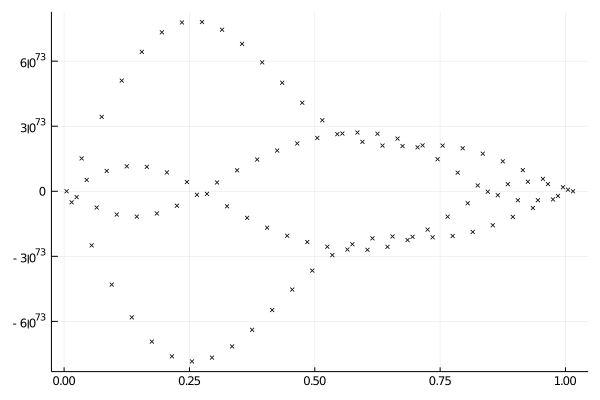

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [18]:
using Plots

pos_data = Array{Float64,1}(undef,0)
var_data = Array{Float64,1}(undef,0)

for idx = 1 : length(my_mesh.CELLs)
    push!(pos_data, my_mesh.CELLs[idx].CENTER_POS)
    push!(var_data, my_mesh.CELLs[idx].CELL_VAR[end])
end

plot(pos_data, var_data, seriestype=:scatter, markershape = :xcross, markersize = 2,
                                               markercolor = :black, legend = false)